<a href="https://colab.research.google.com/github/xxxnmxhj00/Final-Project/blob/main/PM%EA%B0%9D%EC%B2%B4%EC%9D%B8%EC%8B%9D%EB%AA%A8%EB%8D%B8%20YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/autogyro/yolo-V8.git

Cloning into 'yolo-V8'...
remote: Enumerating objects: 2723, done.
remote: Total 2723 (delta 0), reused 0 (delta 0), pack-reused 2723 (from 1)
Receiving objects: 100% (2723/2723), 1.41 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (1855/1855), done.


In [ ]:
# YOLOv8 모델을 사용하기 위해 필요한 패키지를 설치합니다.
!pip install ultralytics

In [ ]:
!pip install -r '/content/yolo-V8/requirements.txt'

In [ ]:
# data.yaml 파일을 작성하여 수정된 데이터셋 경로와 클래스 이름을 정의합니다.
yaml_content = """
path: /content/yolo-V8
train: /content/yolo-V8/images/train
val: /content/yolo-V8/images/val

names:
  0: bike_stand
  1: bike_lie
  2: crosswalk
  3: braille_block
  4: traffic_island
  5: protection_area
  6: bike_road
  7: car_road
"""

# yaml 파일 생성
with open('/content/yolo-V8/data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 초기화
model = YOLO('/content/yolo-V8/')  # 더 큰 YOLOv8 모델의 사전 학습된 가중치로 초기화

# 모델 학습 시작
model.train(
    data='/content/yolo-V8/data.yaml',   # 수정된 data.yaml 파일 경로
    epochs=100,                          # 학습 반복 횟수
    imgsz=640,                           # 입력 이미지 크기
    batch=16,                            # 배치 크기
    lr0=0.001,                           # 초기 학습률
    lrf=0.01,                            # 최종 학습률 비율
    momentum=0.937,                      # 모멘텀
    weight_decay=0.0005,                 # 가중치 감쇠
    augment=True,                        # 데이터 증강 활성화
    optimizer='Adam',                    # 옵티마이저 설정 (SGD 또는 Adam)
    patience=15,                         # 조기 종료를 위한 인내 에폭 설정
    save_period=5                        # 매 5 에폭마다 모델 저장
)

KeyError: 'model'

In [ ]:
# 학습된 모델을 이용해 테스트 이미지에서 객체를 탐지합니다.
# 테스트할 이미지의 경로를 지정합니다.
test_image_path = '/content/yolo-V8/images/test/scooter1.png'  # 테스트할 이미지 경로

# 예측 수행 및 결과 저장
results = model.predict(source=test_image_path, save=True)

# Since results is a list of Results objects, access the first element
# which corresponds to the prediction for the single image.
results = results[0]

# 예측 결과 출력 -  'print' is not a valid method for the Results object.
# Use 'print(results)' or results.boxes.print() instead.
print(results) # Prints a summary of the results.


image 1/1 /content/yolo-V8/images/test/0002.jpg: 384x640 1 bike_stand, 9 crosswalks, 1 braille_block, 1 car_road, 80.1ms
Speed: 8.4ms preprocess, 80.1ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict3
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'bike_stand', 1: 'bike_lie', 2: 'crosswalk', 3: 'braille_block', 4: 'traffic_island', 5: 'protection_area', 6: 'bike_road', 7: 'car_road'}
obb: None
orig_img: array([[[ 82,  81, 155],
        [ 91,  90, 164],
        [ 87,  88, 162],
        ...,
        [157, 141, 125],
        [163, 147, 131],
        [162, 146, 130]],

       [[102, 101, 175],
        [ 98,  97, 169],
        [ 84,  85, 159],
        ...,
        [160, 144, 128],
        [162, 146, 130],
        [163, 147, 131]],

       [[ 86,  85, 157],
        [ 97,  97, 167],
        [ 91,  90, 162


image 1/1 /content/yolo-V8/images/test/scooter1.png: 480x640 2 bike_stands, 3 braille_blocks, 1 car_road, 52.1ms
Speed: 3.9ms preprocess, 52.1ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict2


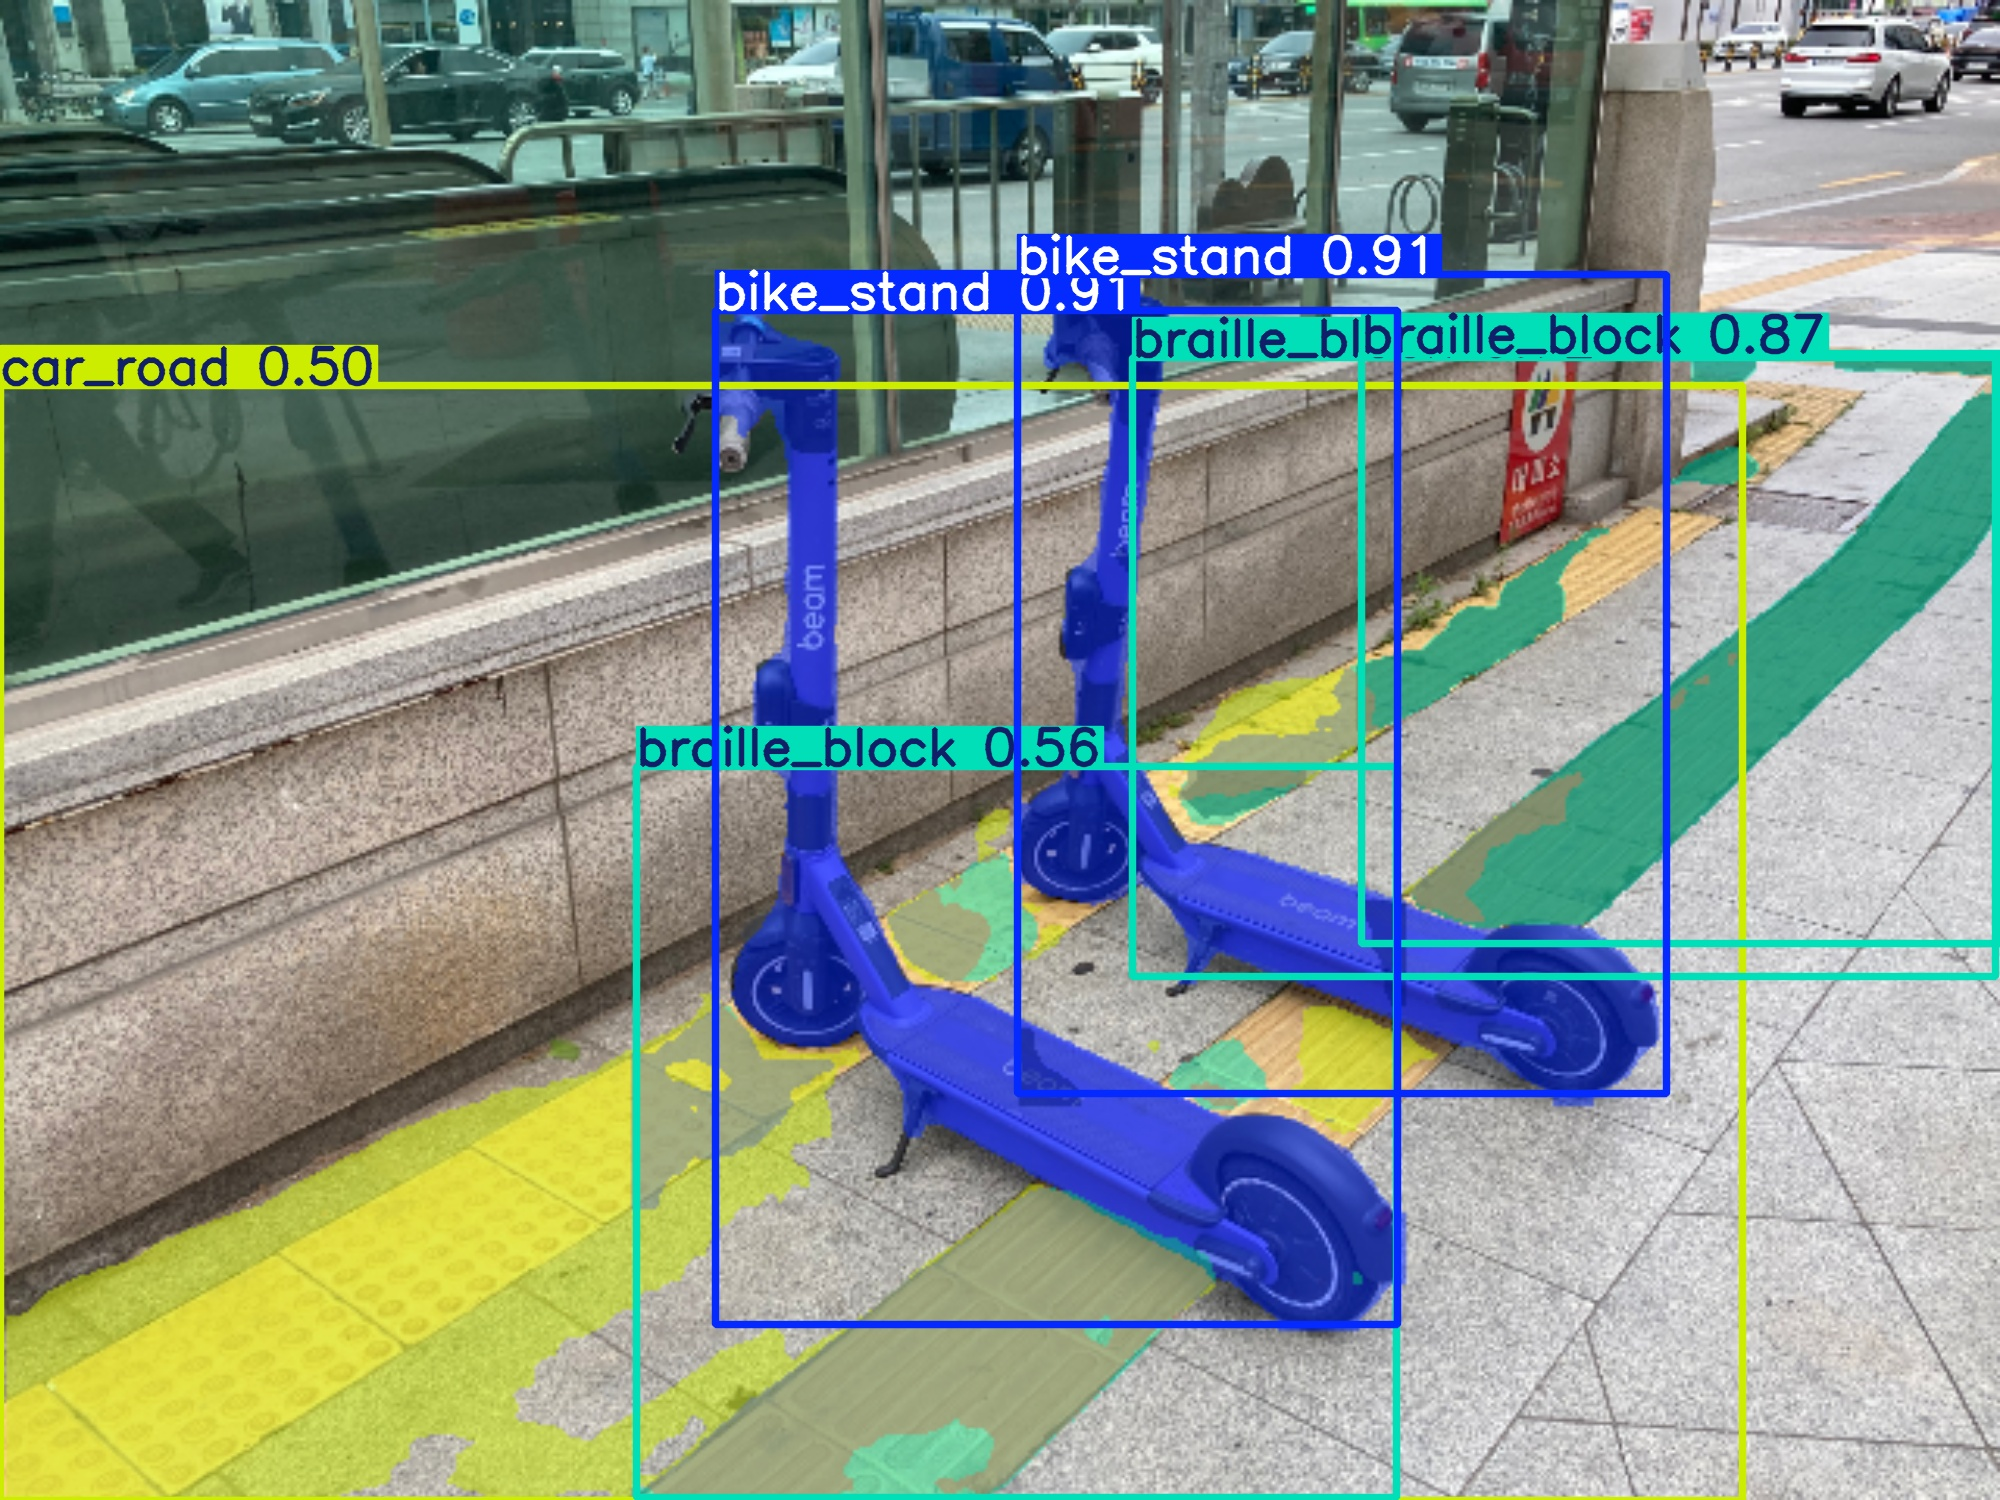

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# 1. 학습된 모델 로드
# 학습된 모델의 가중치 파일 경로를 지정합니다.
model = YOLO('/content/runs/segment/train/weights/best.pt')  # 학습된 모델의 가중치 파일 로드

# 2. 객체 탐지 수행
# 탐지를 수행할 이미지 경로를 설정합니다.
new_image_path = '/content/yolo-V8/images/test/scooter1.png'  # 테스트할 이미지 경로를 지정

# 예측 수행
results = model.predict(source=new_image_path, save=True)

# 3. 예측 결과 출력
# 예측 결과 이미지를 저장한 폴더에서 불러와 표시합니다.
# YOLOv8은 기본적으로 예측된 이미지를 `/content/runs/predict` 폴더에 저장합니다.
predicted_image_path = '/content/runs/segment/predict/scooter1.jpg'  # 실제 경로는 실행 후 확인 필요

# 예측 결과 이미지 표시
display(Image(filename=predicted_image_path))